<img src='https://www.anadronestarting.com/wp-content/uploads/intel-main_opt.png' width=50%>

# 모바일넷을 이용한 이미지분류
<font size=5><b>(Image Classification using Mobilenet)<b></font>

<div align='right'>성  민  석<br>(Minsuk Sung)</div>

<img src='https://chaosmail.github.io/images/deep-learning/classification.png' width=60%>

---

<h1>강의목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#필요한-라이브러리-및-옵션" data-toc-modified-id="필요한-라이브러리-및-옵션-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>필요한 라이브러리 및 옵션</a></span><ul class="toc-item"><li><span><a href="#기본-라이브러리(Library)" data-toc-modified-id="기본-라이브러리(Library)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>기본 라이브러리(Library)</a></span></li><li><span><a href="#옵션(Option)" data-toc-modified-id="옵션(Option)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>옵션(Option)</a></span></li></ul></li><li><span><a href="#예제---VOC2012" data-toc-modified-id="예제---VOC2012-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>예제 - VOC2012</a></span><ul class="toc-item"><li><span><a href="#VOC-2012란?" data-toc-modified-id="VOC-2012란?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>VOC 2012란?</a></span></li><li><span><a href="#VOC-데이터의-구성" data-toc-modified-id="VOC-데이터의-구성-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>VOC 데이터의 구성</a></span></li><li><span><a href="#다운로드-링크" data-toc-modified-id="다운로드-링크-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>다운로드 링크</a></span></li><li><span><a href="#학습에-필요한-상수" data-toc-modified-id="학습에-필요한-상수-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>학습에 필요한 상수</a></span></li><li><span><a href="#모델-컴파일" data-toc-modified-id="모델-컴파일-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>모델 컴파일</a></span></li><li><span><a href="#모델-학습하기" data-toc-modified-id="모델-학습하기-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>모델 학습하기</a></span></li><li><span><a href="#모델-저장하기" data-toc-modified-id="모델-저장하기-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>모델 저장하기</a></span></li><li><span><a href="#모델-평가하기" data-toc-modified-id="모델-평가하기-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>모델 평가하기</a></span></li><li><span><a href="#테스트해보기" data-toc-modified-id="테스트해보기-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>테스트해보기</a></span></li></ul></li><li><span><a href="#참고" data-toc-modified-id="참고-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>참고</a></span></li></ul></div>

## 필요한 라이브러리 및 옵션

### 기본 라이브러리(Library)

In [1]:
import os
import sys
import glob
import random
import itertools
from pathlib import Path
from tqdm import tqdm
import pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
import cv2
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, ElementTree

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy
from tensorflow.keras.callbacks import Callback
from tensorflow.python.client import device_lib

Using TensorFlow backend.
/home/minsuk/anaconda3/envs/work/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/minsuk/anaconda3/envs/work/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/minsuk/anaconda3/envs/work/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/minsuk/anaconda3/env

### 옵션(Option)

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
%matplotlib inline
print(device_lib.list_local_devices())
keras.backend.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12489807308848747063
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17509990967997018206
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7299268608
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11968156047668981010
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17399298091019579420
physical_device_desc: "device: XLA_GPU device"
]






['/job:localhost/replica:0/task:0/device:GPU:0']

---

## 예제 - VOC2012

![](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/pascal2.png)

### VOC 2012란?
VOC2012 : Visual Object Classes Challenge 2012 (VOC2012)

### VOC 데이터의 구성
PASCAL VOC Dataset을 다운받아 압축을 풀면 다음과 같은 구조를 확인할 수 있습니다.
```
VOC2012
├── Annotations
│   ├── 2010_000002.xml
│   ├── 2010_000003.xml
│   ├── 2011_000002.xml
│   └── ...
├── ImageSets
│   ├── Action
│   ├── Layout
│   ├── Main
│   └── Segmentation
├── JPEGImages
│   ├── 2010_000002.jpg
│   ├── 2010_000003.jpg
│   ├── 2011_000002.jpg
│   └── ...
├── SegmentationClass
│   ├── 2010_000002.png
│   ├── 2010_000003.png
│   └── 2011_000003.png
└── SegmentationObject
    ├── 2010_000002.png
    ├── 2010_000003.png
    └── ...
```

- Annotations : JPEGImages 폴더 속 원본 이미지와 같은 이름들의 xml파일들이 존재합니다. Object Detection을 위한 정답 데이터이 됩니다.

- ImageSets : 어떤 이미지 그룹을 test, train, trainval, val로 사용할 것인지, 특정 클래스가 어떤 이미지에 있는지 등에 대한 정보들을 포함하고 있는 폴더입니다.

- JPEGImages : jpg확장자를 가진 이미지 파일들이 모여있는 폴더입니다. Object Detection에서 입력 데이터가 됩니다.

- SegmentationClass : Semantic segmentation을 학습하기 위한 label 이미지입니다.

- SegmentationObject : Instance segmentation을 학습하기 위한 label 이미지입니다.

Object Detection을 할 때는 주로 Annotations, JPEGImages폴더가 사용됩니다. 모델에 입력으로 넣는 입력데이터인 경우 그냥 load 해서 사용하면 되나, 지도학습에 핵심이 되는 정답 데이터의 경우는 parsing이 필요한 경우가 있으므로 Annotations의 xml 구조는 잘 알아두는 것이 중요합니다.

출처 : https://deepbaksuvision.github.io/Modu_ObjectDetection/posts/02_01_PASCAL_VOC.html

### 다운로드 링크
- http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
- https://pjreddie.com/projects/pascal-voc-dataset-mirror/

> VOC 2012 데이터는 한 이미지 내에 여러가지 객체가 존재합니다. 그래서 기존의 방법과는 조금 다르게 접근해야합니다.  
아래 코드를 따라가봅시다.

In [6]:
# 우리가 분류할 20개의 클래스
CLASSES = ['person',  # Person
           'bird', 'cat', 'cow', 'dog', 'horse', 'sheep', # Animal
           'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike', 'train', # Vehicle
           'bottle', 'chair', 'dining table', 'potted plant', 'sofa', 'tv monitor' # Indoor
          ]

### 학습에 필요한 상수

In [7]:
# 학습에 필요한 상수들
IMG_SHAPE = (224, 224, 3)
LEARNING_RATE = 2e-5
BATCH_SIZE = 4
EPOCHS = 3

# 각 이미지의 기본 주소
BASE_PATH = './data/VOC2012/JPEGImages/'
images_dir = Path(BASE_PATH).expanduser()
print(images_dir)

# 각 이미지별 클래스의 기본 주소
XML_BASE_PATH = './data/VOC2012/Annotations/'
annotations_dir = Path(XML_BASE_PATH).expanduser()
print(annotations_dir)

data/VOC2012/JPEGImages
data/VOC2012/Annotations


--------------------------------------------------
Image properties
--------------------------------------------------
File : ./data/VOC2012/JPEGImages/2010_006034.jpg
width : 500
height : 375
channels : 3



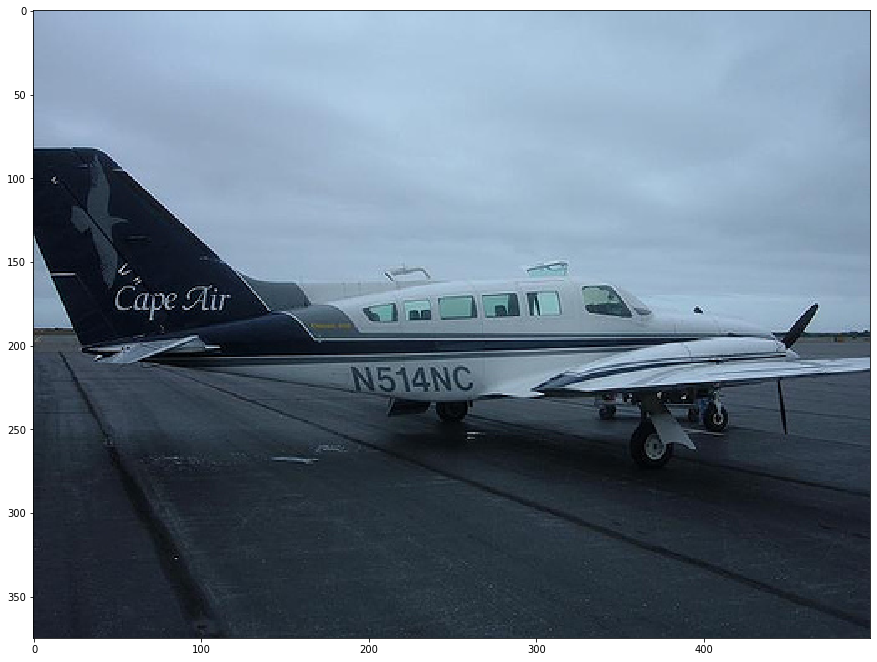

--------------------------------------------------
Objects Description
--------------------------------------------------
class : aeroplane
xmin :   1, ymin :  83
xmax : 499, ymax : 272



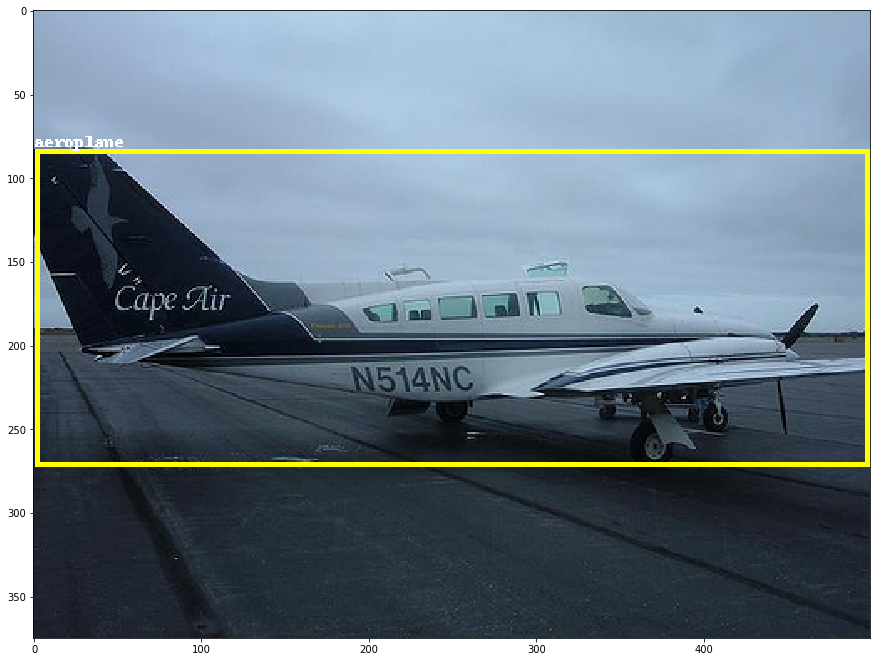

In [8]:
flist = glob.glob(BASE_PATH+'*.jpg')
idx = np.random.randint(0,len(flist))
fpath = flist[idx]
img = cv2.imread(fpath)
fname = os.path.basename(fpath).split('.')[0]

image = Image.open(fpath).convert("RGB")
draw = ImageDraw.Draw(image)

xml = open(XML_BASE_PATH+fname+'.xml', "r")
tree = ET.parse(xml)
root = tree.getroot()

size = root.find("size")

width = size.find("width").text
height = size.find("height").text
channels = size.find("depth").text

print('-'*50)
print("Image properties")
print('-'*50)
print('File : {}'.format(fpath))
print("width : {}\nheight : {}\nchannels : {}\n".format(width, height, channels))
plt.figure(figsize=(15,12))
plt.imshow(image)
plt.show()

objects = root.findall("object")
print('-'*50)
print("Objects Description")
print('-'*50)
for _object in objects:
    name = _object.find("name").text
    bndbox = _object.find("bndbox")
    xmin = int(bndbox.find("xmin").text)
    ymin = int(bndbox.find("ymin").text)
    xmax = int(bndbox.find("xmax").text)
    ymax = int(bndbox.find("ymax").text)
    
    # Box를 그릴 때, 왼쪽 상단 점(xmin,ymin)과, 오른쪽 하단 점의 좌표(xmax,ymax)를 입력으로 주면 됩니다.
    draw.rectangle(((xmin, ymin), (xmax, ymax)), outline="yellow",width=3)
    draw.text((xmin, ymin-10), name,align='center')

    print("class : {:3}\nxmin : {:3}, ymin : {:3}\nxmax : {:3}, ymax : {:3}\n".format(name, xmin, ymin, xmax, ymax))

plt.figure(figsize=(15,12))
plt.imshow(image)
plt.show()

In [9]:
def xml_to_labels(xml_data, unique_labels):
    root = ET.XML(xml_data)
    labels = set() if unique_labels else []
    labels_add = labels.add if unique_labels else labels.append # speeds up method lookup
    for i, child in enumerate(root):
        if child.tag == 'filename':
            img_filename = child.text
        if child.tag == 'object':
            for subchild in child:
                if subchild.tag == 'name':
                    labels_add(subchild.text)
    return img_filename, list(labels)

def get_labels(annotations_dir, unique_labels=True):
    for annotation_file in annotations_dir.iterdir():
        with open(annotation_file) as f:
            yield xml_to_labels(f.read(), unique_labels)

In [10]:
img_metadata = pd.DataFrame(get_labels(annotations_dir), columns=['filename', 'labels'])
print('Found {} images'.format(len(img_metadata)))
img_metadata.sample(5)

Found 17125 images


,filename,labels
3353,2010_002722.jpg,"[person, train]"
8064,2011_005644.jpg,[person]
8778,2012_002843.jpg,[person]
1591,2010_001675.jpg,[horse]
14824,2009_002813.jpg,[cat]


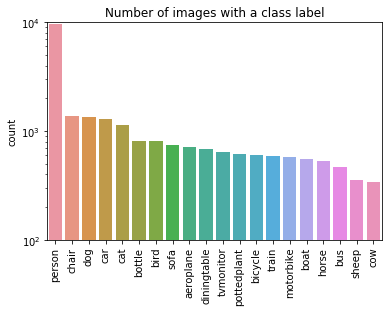

In [11]:
all_labels = [label for lbs in img_metadata['labels'] for label in lbs]
labels_count = Counter(all_labels)
ax = sns.countplot(all_labels, order=[k for k, _ in labels_count.most_common()], log=True)
ax.set_title('Number of images with a class label')
ax.set_ylim(1E2, 1E4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

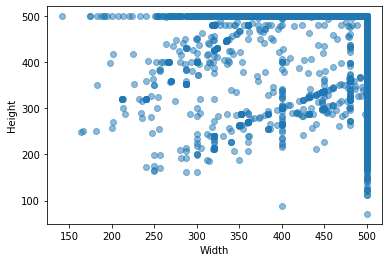

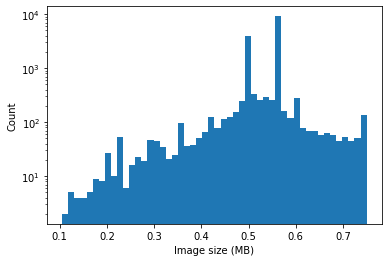

In [12]:
height, width, size = np.empty(len(img_metadata)), np.empty(len(img_metadata)), np.empty(len(img_metadata)) 
for i, img_filepath in img_metadata['filename'].iteritems():
    w, h = Image.open(images_dir.joinpath(img_filepath)).size
    width[i], height[i], size[i] = w, h, w * h * 3 * 1E-6
plt.scatter(width, height, alpha=0.5)
plt.xlabel('Width'); plt.ylabel('Height'); plt.show()
plt.hist(size, bins=50, log=True)
plt.xlabel('Image size (MB)');
plt.ylabel('Count')
plt.show()

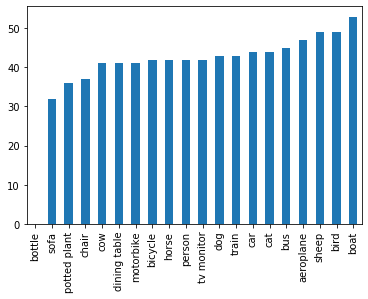

bottle           0
sofa            32
potted plant    36
chair           37
cow             41
dining table    41
motorbike       41
bicycle         42
horse           42
person          42
tv monitor      42
dog             43
train           43
car             44
cat             44
bus             45
aeroplane       47
sheep           49
bird            49
boat            53
dtype: int64


In [13]:
class_list = []
num_list = []

IMAGE_BASE_PATH = './data/VOC4IC/'
train_path = IMAGE_BASE_PATH + 'train/'
for folder in os.listdir(train_path):
    folder_size = len(os.listdir(train_path+folder))
#     print('{:<15} : {}'.format(folder,folder_size))
    class_list.append(folder)
    num_list.append(folder_size)
    
voc_s = pd.Series(num_list,index=class_list)
voc_s.sort_values().plot(kind='bar')
plt.show()

print(voc_s.sort_values())

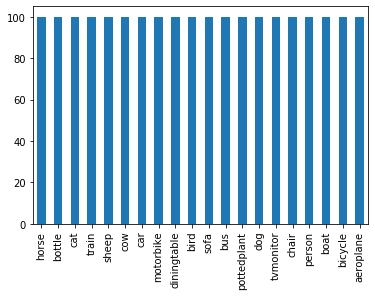

horse          100
bottle         100
cat            100
train          100
sheep          100
cow            100
car            100
motorbike      100
diningtable    100
bird           100
sofa           100
bus            100
pottedplant    100
dog            100
tvmonitor      100
chair          100
person         100
boat           100
bicycle        100
aeroplane      100
dtype: int64


In [14]:
class_list = []
num_list = []

IMAGE_BASE_PATH = './data/VOC4IC/'
test_path = IMAGE_BASE_PATH + 'test/'
for folder in os.listdir(test_path):
    folder_size = len(os.listdir(test_path+folder))
#     print('{:<15} : {}'.format(folder,folder_size))
    class_list.append(folder)
    num_list.append(folder_size)
    
voc_s = pd.Series(num_list,index=class_list)
voc_s.sort_values().plot(kind='bar')
plt.show()

print(voc_s.sort_values())

In [15]:
base_model = MobileNetV2(input_shape=(224,224,3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
set_trainable = False
for layer in tqdm(base_model.layers):
    if layer.name in ['block_14_expand','block_15_expand', 'block_16_expand']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

100%|██████████| 155/155 [00:00<00:00, 58269.89it/s]


In [17]:
layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]

pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_1,False
1,<tensorflow.python.keras.layers.convolutional....,Conv1_pad,False
2,<tensorflow.python.keras.layers.convolutional....,Conv1,False
3,<tensorflow.python.keras.layers.normalization....,bn_Conv1,False
4,<tensorflow.python.keras.layers.advanced_activ...,Conv1_relu,False
...,...,...,...
150,<tensorflow.python.keras.layers.convolutional....,block_16_project,True
151,<tensorflow.python.keras.layers.normalization....,block_16_project_BN,True
152,<tensorflow.python.keras.layers.convolutional....,Conv_1,True
153,<tensorflow.python.keras.layers.normalization....,Conv_1_bn,True


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1300      
Total params: 2,947,988
Trainable params: 690,004
Non-trainable params: 2,257,984
_________________________________________________________________


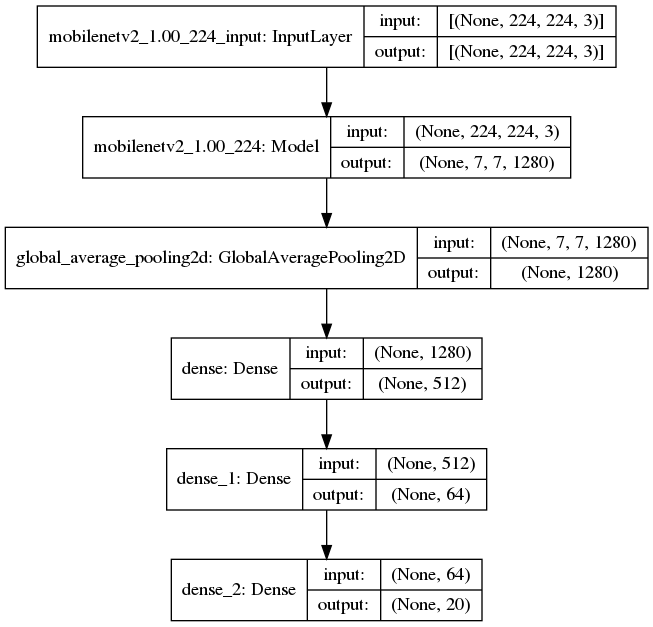

In [18]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512,activation='relu'),
    Dense(64,activation='relu'),
    Dense(len(CLASSES), activation='softmax')
])
model.summary()

plot_model(model,to_file='./img/model/voc2012_mobilenet_model.png',show_shapes=True)

### 모델 컴파일

In [19]:
model.compile(loss=categorical_crossentropy, 
              optimizer=Adam(learning_rate=0.0001), # transfer learning 여기서 학습률을 더 작게 
              metrics=['acc'])

### 모델 학습하기

In [20]:
train_datagen = ImageDataGenerator(rotation_range=30,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

train_set = train_datagen.flow_from_directory(IMAGE_BASE_PATH + 'train/',
                                              target_size=(224, 224),
                                              batch_size=4,
                                              shuffle=True,
                                              class_mode='categorical')

Found 798 images belonging to 20 classes.


In [21]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_set = valid_datagen.flow_from_directory(IMAGE_BASE_PATH + 'valid/',
                                            target_size=(224, 224),
                                            batch_size=4,
                                            shuffle=True,
                                            class_mode='categorical')

Found 10000 images belonging to 20 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(IMAGE_BASE_PATH + 'test/',
                                            target_size=(224, 224),
                                            batch_size=4,
                                            shuffle=True,
                                            class_mode='categorical')

Found 2000 images belonging to 20 classes.


In [23]:
history = model.fit_generator(train_set,
                              steps_per_epoch=train_set.n // train_set.batch_size,
                              epochs=10,
                              validation_data=valid_set,
                              validation_steps=valid_set.n // valid_set.batch_size,
                              )

Epoch 1/10
199/199 [==============================] - 55s 277ms/step - loss: 2.5866 - acc: 0.2657 - val_loss: 2.7006 - val_acc: 0.2560
Epoch 2/10
199/199 [==============================] - 52s 262ms/step - loss: 1.7075 - acc: 0.5542 - val_loss: 2.4598 - val_acc: 0.3568
Epoch 3/10
199/199 [==============================] - 52s 262ms/step - loss: 1.1761 - acc: 0.6965 - val_loss: 2.4822 - val_acc: 0.4122
Epoch 4/10
199/199 [==============================] - 51s 257ms/step - loss: 1.0292 - acc: 0.7280 - val_loss: 2.6428 - val_acc: 0.4226
Epoch 5/10
199/199 [==============================] - 50s 252ms/step - loss: 0.8787 - acc: 0.7620 - val_loss: 2.6761 - val_acc: 0.4286
Epoch 6/10
199/199 [==============================] - 52s 259ms/step - loss: 0.7645 - acc: 0.7783 - val_loss: 2.7816 - val_acc: 0.4324
Epoch 7/10
199/199 [==============================] - 54s 271ms/step - loss: 0.7293 - acc: 0.7771 - val_loss: 2.8059 - val_acc: 0.4418
Epoch 8/10
199/199 [==============================] - 5

### 모델 저장하기

In [24]:
model.save('./bin/mobilenetv2_class20.h5')

class20 = dict()
for key,value in test_set.class_indices.items():
    class20[value] = key

with open('./bin/class20.pickle', 'wb') as f:
    pickle.dump(class20, f)

### 모델 평가하기

In [25]:
train_loss, train_acc = model.evaluate_generator(train_set)
print('Train Loss : {}'.format(train_loss))
print('Train Accuracy : {}'.format(train_acc))

test_loss, test_acc = model.evaluate_generator(test_set)
print('Test Loss : {}'.format(test_loss))
print('Test Accuracy : {}'.format(test_acc))

Train Loss : 0.2988599761924706
Train Accuracy : 0.9122806787490845
Test Loss : 3.1009939834624527
Test Accuracy : 0.4514999985694885


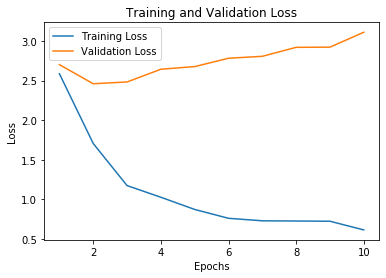

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

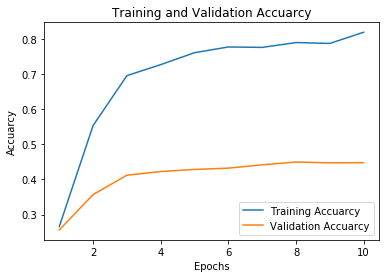

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,label='Training Accuarcy')
plt.plot(epochs,val_acc,label='Validation Accuarcy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

### 테스트해보기

In [28]:
def predict_test_img(path):
    img = cv2.imread(path) 
    
    model = load_model('./bin/mobilenetv2_class20.h5')
    
    print('Original Shape : ',img.shape)
    
    img = cv2.resize(img, (224,224), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    print('Resized Shape : ',img.shape)
    plt.imshow(img)
    plt.show()
    
    ans = model.predict_classes(np.expand_dims(img,axis=0))
    with open('./bin/class20.pickle','rb') as f:
        class20 = pickle.load(f)
    print('Predict : {}'.format(class20[ans[0]]))
    
    predicted_result = model.predict(np.expand_dims(img,axis=0))

    pd.DataFrame(predicted_result,columns=class20.values()).iloc[0].plot(kind='bar')
    plt.show()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Original Shape :  (428, 590, 3)
Resized Shape :  (224, 224, 3)


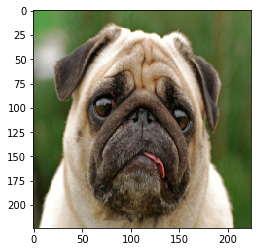

Predict : dog


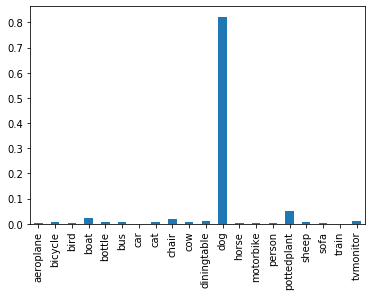

In [29]:
predict_test_img('img/test/dog.jpg')

Original Shape :  (165, 305, 3)
Resized Shape :  (224, 224, 3)


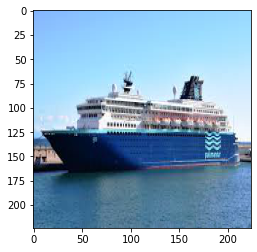

Predict : boat


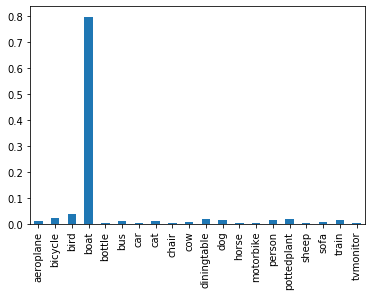

In [30]:
predict_test_img('img/test/boat.jpg')

Original Shape :  (260, 194, 3)
Resized Shape :  (224, 224, 3)


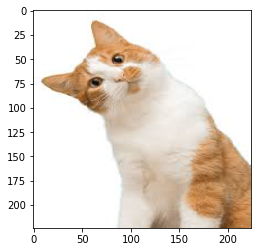

Predict : cat


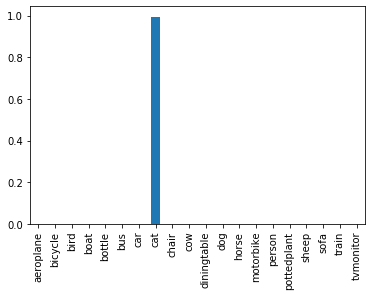

In [31]:
predict_test_img('img/test/cat.jpg')

Original Shape :  (440, 750, 3)
Resized Shape :  (224, 224, 3)


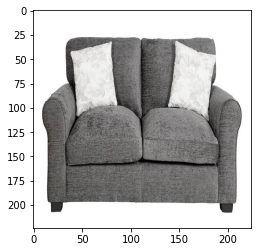

Predict : sofa


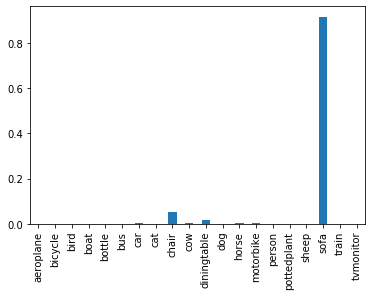

In [32]:
predict_test_img('img/test/sofa.jpg')

Original Shape :  (655, 1000, 3)
Resized Shape :  (224, 224, 3)


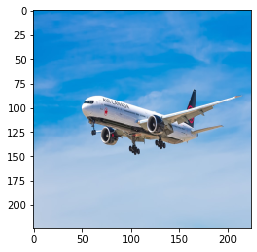

Predict : aeroplane


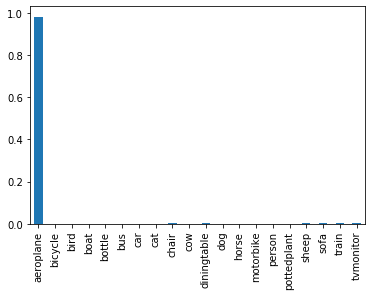

In [33]:
predict_test_img('img/test/aeroplane.jpg')

Original Shape :  (175, 289, 3)
Resized Shape :  (224, 224, 3)


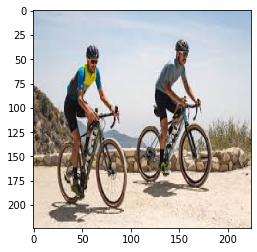

Predict : bicycle


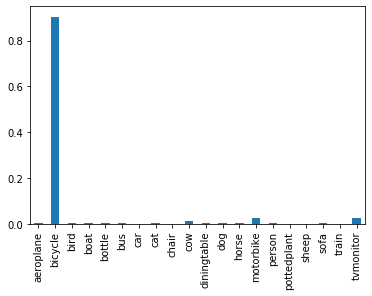

In [34]:
predict_test_img('img/test/person_bike.jpg')

---

## 참고

- Intel
    - https://www.intel.co.kr/
- Intel OpenVINO
    - https://software.intel.com/en-us/openvino-toolkit
- MNIST
    - http://yann.lecun.com/exdb/mnist/
- CIFAR10
    - https://www.cs.toronto.edu/~kriz/cifar.html
- ImageNet
    - http://www.image-net.org
- Tensorflow
    - https://www.tensorflow.org/?hl=ko
- Keras
    - https://keras.io/
    - https://tensorflow.blog/2019/03/06/tensorflow-2-0-keras-api-overview/
    - https://tykimos.github.io/2017/02/22/Integrating_Keras_and_TensorFlow/
    - https://tykimos.github.io/2017/03/08/CNN_Getting_Started/
    - https://raw.githubusercontent.com/keras-team/keras-docs-ko/master/sources/why-use-keras.md
- Keras to Caffe
     - https://github.com/uhfband/keras2caffe
     - http://www.deepvisionconsulting.com/from-keras-to-caffe/
- Fully Connected Layer
    - https://sonofgodcom.wordpress.com/2018/12/31/cnn%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%B4%EB%B3%B4%EC%9E%90-fully-connected-layer%EB%8A%94-%EB%AD%94%EA%B0%80/
- Convultional Nueral Network
    - http://aikorea.org/cs231n/convolutional-networks/
    - http://cs231n.stanford.edu/
- CNN Models
    - https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/

- VOC2012
    - https://blog.godatadriven.com/rod-keras-multi-label
    - https://gist.github.com/rragundez/ae3a17428bfec631d1b35dcdc6296a85#file-multi-label_classification_with_keras_imagedatagenerator-ipynbhttps://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html
    - http://research.sualab.com/introduction/2017/11/29/image-recognition-overview-1.html